<a href="https://colab.research.google.com/github/saadmansur/Privacy-Policy/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

trainX shape == (127, 60, 10).
trainY shape == (127, 1).


<ipython-input-28-e61461d4ba5b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_Lag7'] = df['Sale'].shift(7)
<ipython-input-28-e61461d4ba5b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_MA_7'] = df['Sale'].rolling(window=7).mean()
<ipython-input-28-e61461d4ba5b>:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the 

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                       │ (None, 60, 64)              │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 60, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,265 (75.25 KB)

 Trainable params: 19,265 (75.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 1.1135 - val_loss: 0.2664
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.8058 - val_loss: 0.2725
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.6176 - val_loss: 0.2877
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.7608 - val_loss: 0.2926
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.7846 - val_loss: 0.2929
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.7357 - val_loss: 0.2827
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.9615 - val_loss: 0.2785
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.0775 - val_loss: 0.2765
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.8334 - val_loss: 0.2772
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.0444 - val_loss: 0.2766
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.7155 - val_loss: 0.2772
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.9252 - val_l

<ipython-input-28-e61461d4ba5b>:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


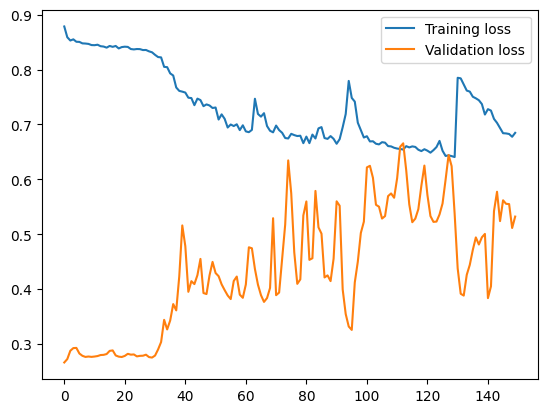

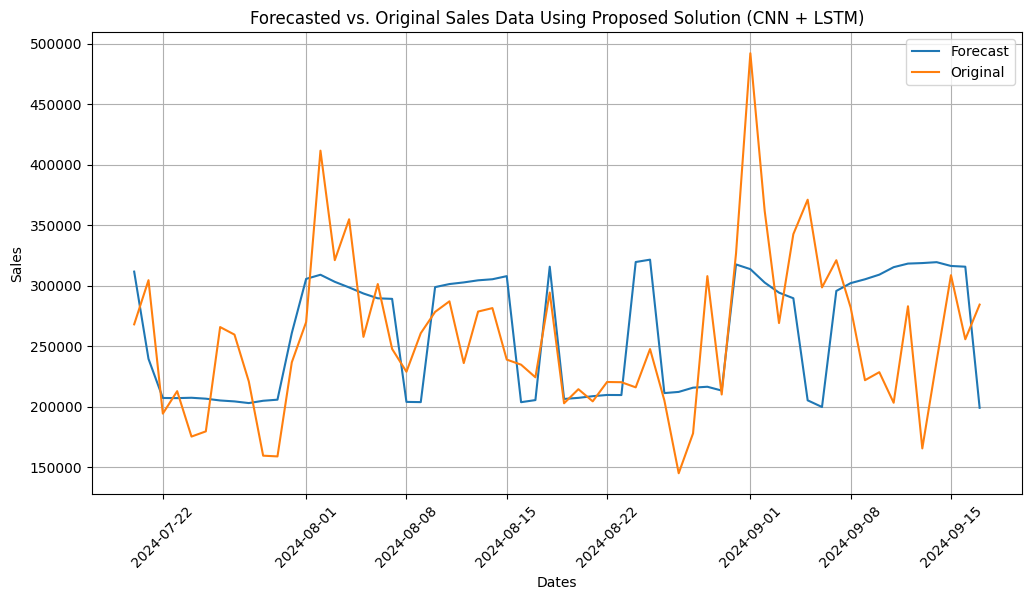

In [28]:
#### code LSTM + only sales data

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from datetime import datetime

# Load the dataset
df = pd.read_csv("/content/sample_data/Sales_Data_Fsd_All.csv")
#column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

df['DaySin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayCos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

# Feature Engineering (Example: Lagged Sales)
df['Lagged_Sales'] = df['Sale'].shift(1)
df = df.dropna()  # Remove rows with NaN values after shifting

df['Sales_Lag7'] = df['Sale'].shift(7)

df['Sales_MA_7'] = df['Sale'].rolling(window=7).mean()
df = df.dropna()  # Remove NaN values after calculating moving average

df['Sales_Std7'] = df['Sale'].rolling(window=7).std()

# Calculate lagged differences
df['Sales_Diff'] = df['Sale'] - df['Sale'].shift(1)
df = df.dropna()

# Create day of the week feature (0 = Monday, 6 = Sunday)
df['Day_of_Week11'] = df['Date'].dt.dayofweek  # Create 'Day_of_Week11' before selecting features

# Select features for the model
features = ['Sale', 'Lagged_Sales', 'DaySin', 'DayCos', 'Sales_Lag7', 'Status', 'Sales_MA_7', 'Sales_Diff', 'Sales_Std7', 'Day_of_Week11']
data = df[features]

# One-hot encode day of the week to add categorical weekday effect
data = pd.get_dummies(data, columns=['Day_of_Week11'], drop_first=True) # One-hot encode after selecting features



data = data.values # Convert to NumPy array after value replacement


# #Variables for training
# cols = list(df)[1:13]
# #Date and volume columns are not used in training.
# print(cols)

#New dataframe with only training data - 13 columns
df_for_training = df[features]



# Convert 'Status' values in df_for_training to numeric representations:
df_for_training['Status'].replace(['OPEN', 'CLOSED'], [0, 1], inplace=True)

# # Convert 'EffectiveRain values within the DataFrame
# df_for_training['EffectiveRain'].replace(['No', 'EffectiveRain'],
#                         [0, 1], inplace=True)

# # Convert 'EffectiveTemperature values within the DataFrame
# df_for_training['EffectiveTemperature'].replace(['No', 'HotWeather'],
#                         [0, 1], inplace=True)


# # Convert 'PositiveEvents values within the DataFrame
# df_for_training['PositiveEvents'].replace(['No', 'SalaryDay', 'Holiday', 'Promotions', 'Event'],
#                         [0, 1, 2, 3, 4], inplace=True)

# # Convert 'NegativeEvents values within the DataFrame
# df_for_training['NegativeEvents'].replace(['No', 'Wednesday', 'Protest', 'PartiallyClosed'],
#                         [0, 1, 2, 3], inplace=True)



df_for_training = df_for_training.astype(int)


#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features.

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 60  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))



# define the Autoencoder model

model = Sequential()

# # LSTM + CNN
# model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))  # CNN layer
# model.add(MaxPooling1D(pool_size=2))  # Pooling layer
# model.add(LSTM(50, return_sequences=False))  # LSTM layerers
# model.add(Dense(trainY.shape[1]))
# model.compile(optimizer='adam', loss='mse')

# Only LSTM
# model.add(LSTM(64, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(32))
# model.add(Dropout(0.2))
# model.add(Dense(trainY.shape[1]))
# model.compile(optimizer='adam', loss='mse')

# Only CNN
model.add(LSTM(64, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))
# model.add(LSTM(32))
# model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')

model.summary()



# fit the model
history = model.fit(trainX, trainY, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


n_past = 60
n_days_for_prediction=60  #let us predict past 60 days

# Get training dates from the 'Date' column of the original DataFrame
train_dates = df['Date']  # Assuming 'Date' column contains datetime objects


predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
# print(predict_period_dates)


# For LSTM and Hybrid
#Make prediction
# prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

# #Perform inverse transformation to rescale back to original range
# #Since we used 5 variables for transform, the inverse expects same dimensions
# #Therefore, let us copy our values 5 times and discard them after inverse transform
# prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
# y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
# end LSTM and Hybrid


# For CNN
# Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:])  # shape = (n, 1) where n is the n_days_for_prediction

# Reshape prediction to 2D by taking the last timestep
prediction = prediction[:, -1, :]  # Select the last timestep

# Get the original number of features
num_features = df_for_training.shape[1]
# Create an array of zeros with the correct shape
filler = np.zeros((prediction.shape[0], num_features - 1))
# Concatenate the prediction with the filler array
prediction_reshaped = np.concatenate([prediction, filler], axis=1)

# Perform inverse transformation to rescale back to original range
y_pred_future = scaler.inverse_transform(prediction_reshaped)[:, 0]

# end CNN



# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

# Get the last 'n_days_for_prediction' values from the 'Sale' column
original_sales = df['Sale'].tail(n_days_for_prediction).values

df_forecast = pd.DataFrame({'Date': np.array(forecast_dates),
                            'Sale': y_pred_future.astype(int),
                            'Original': original_sales})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(df_forecast['Sale'] - df_forecast['Original']))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((df_forecast['Sale'] - df_forecast['Original'])**2))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((df_forecast['Sale'] - df_forecast['Original']) / df_forecast['Original'])) * 100

# Print the results
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

original = df[['Date', 'Sale']]
original['Date']=pd.to_datetime(original['Date'])
# original = original.loc[original['Date'] >= '2020-5-1']

print(df_forecast)
df_forecast.to_csv('forecast_sales_results.csv', index=False)
# Plotting the forecast
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(df_forecast['Date'], df_forecast['Sale'], label='Forecast')
plt.plot(df_forecast['Date'], df_forecast['Original'], label='Original')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.title('Forecasted vs. Original Sales Data Using Proposed Solution (CNN + LSTM)')
plt.legend()
plt.grid(True)
plt.show()

['Sale', 'Status', 'EffectiveRain', 'EffectiveTemperature', 'PositiveEvents', 'NegativeEvents', 'DayOfWeek', 'Month', 'DaySin', 'DayCos', 'Lagged_Sales', 'Sales_Lag7']
trainX shape == (127, 60, 12).
trainY shape == (127, 1).


<ipython-input-31-36b7ee588632>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_Lag7'] = df['Sale'].shift(7)
<ipython-input-31-36b7ee588632>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_MA_7'] = df['Sale'].rolling(window=7).mean()
<ipython-input-31-36b7ee588632>:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the 

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_31 (LSTM)                       │ (None, 60, 64)              │          19,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 60, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,777 (77.25 KB)

 Trainable params: 19,777 (77.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.7174 - val_loss: 0.2717
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.8848 - val_loss: 0.2744
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.6519 - val_loss: 0.2736
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7007 - val_loss: 0.2745
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.9505 - val_loss: 0.2730
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.8546 - val_loss: 0.2761
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.6120 - val_loss: 0.2790
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.0136 - val_loss: 0.2763
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.0077 - val_loss: 0.2748
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6841 - val_loss: 0.2750
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.7502 - val_loss: 0.2754
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.0732 - val_l

<ipython-input-31-36b7ee588632>:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


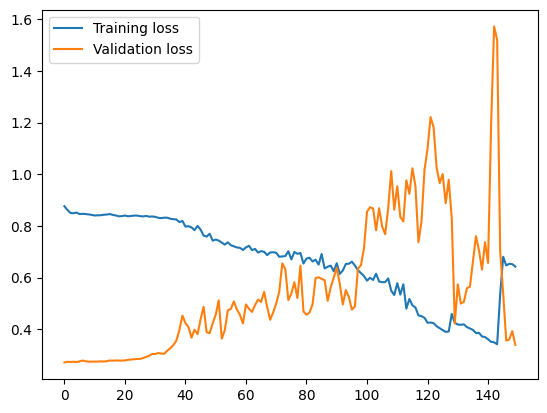

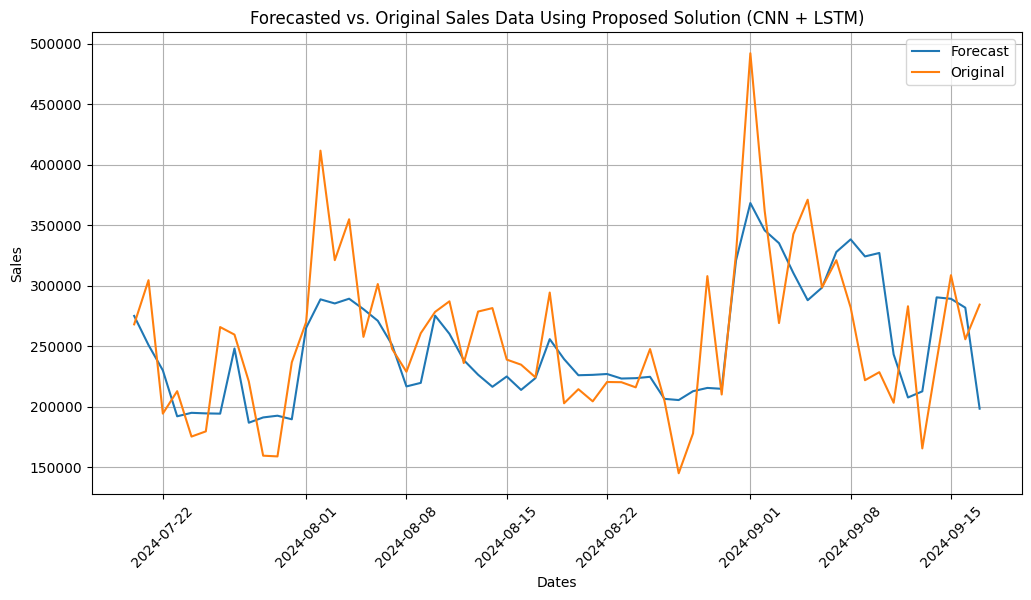

In [31]:
####  LSTM with weather sales

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from datetime import datetime

# Load the dataset
df = pd.read_csv("/content/sample_data/Sales_Data_Fsd_All.csv")
#column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

df['DaySin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayCos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

# Feature Engineering (Example: Lagged Sales)
df['Lagged_Sales'] = df['Sale'].shift(1)
df = df.dropna()  # Remove rows with NaN values after shifting

df['Sales_Lag7'] = df['Sale'].shift(7)

df['Sales_MA_7'] = df['Sale'].rolling(window=7).mean()
df = df.dropna()  # Remove NaN values after calculating moving average

df['Sales_Std7'] = df['Sale'].rolling(window=7).std()

# Calculate lagged differences
df['Sales_Diff'] = df['Sale'] - df['Sale'].shift(1)
df = df.dropna()

# Create day of the week feature (0 = Monday, 6 = Sunday)
df['Day_of_Week11'] = df['Date'].dt.dayofweek  # Create 'Day_of_Week11' before selecting features

# Select features for the model
features = ['Sale', 'Lagged_Sales', 'DaySin', 'DayCos', 'Sales_Lag7', 'Status', 'EffectiveRain', 'Sales_MA_7', 'EffectiveTemperature', 'Sales_Diff', 'Sales_Std7', 'Day_of_Week11']
data = df[features]

# One-hot encode day of the week to add categorical weekday effect
data = pd.get_dummies(data, columns=['Day_of_Week11'], drop_first=True) # One-hot encode after selecting features



data = data.values # Convert to NumPy array after value replacement


#Variables for training
cols = list(df)[1:13]
#Date and volume columns are not used in training.
print(cols)

#New dataframe with only training data - 13 columns
df_for_training = df[features]



# Convert 'Status' values in df_for_training to numeric representations:
df_for_training['Status'].replace(['OPEN', 'CLOSED'], [0, 1], inplace=True)

# Convert 'EffectiveRain values within the DataFrame
df_for_training['EffectiveRain'].replace(['No', 'EffectiveRain'],
                        [0, 1], inplace=True)

# Convert 'EffectiveTemperature values within the DataFrame
df_for_training['EffectiveTemperature'].replace(['No', 'HotWeather'],
                        [0, 1], inplace=True)


# Convert 'PositiveEvents values within the DataFrame
# df_for_training['PositiveEvents'].replace(['No', 'SalaryDay', 'Holiday', 'Promotions', 'Event'],
#                         [0, 1, 2, 3, 4], inplace=True)

# # Convert 'NegativeEvents values within the DataFrame
# df_for_training['NegativeEvents'].replace(['No', 'Wednesday', 'Protest', 'PartiallyClosed'],
#                         [0, 1, 2, 3], inplace=True)



df_for_training = df_for_training.astype(int)


#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features.

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 60  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))



# define the Autoencoder model

model = Sequential()

# LSTM + CNN
# model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))  # CNN layer
# model.add(MaxPooling1D(pool_size=2))  # Pooling layer
# model.add(LSTM(50, return_sequences=False))  # LSTM layerers
# model.add(Dense(trainY.shape[1]))
# model.compile(optimizer='adam', loss='mse')

# Only LSTM
# model.add(LSTM(64, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(32))
# model.add(Dropout(0.2))
# model.add(Dense(trainY.shape[1]))
# model.compile(optimizer='adam', loss='mse')
# model.summary()


# Only CNN
model.add(LSTM(64, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))
# model.add(LSTM(32))
# model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')

model.summary()



# fit the model
history = model.fit(trainX, trainY, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


n_past = 60
n_days_for_prediction=60  #let us predict past 60 days

# Get training dates from the 'Date' column of the original DataFrame
train_dates = df['Date']  # Assuming 'Date' column contains datetime objects


predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
# print(predict_period_dates)


# For LSTM and Hybrid
#Make prediction
# prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

# #Perform inverse transformation to rescale back to original range
# #Since we used 5 variables for transform, the inverse expects same dimensions
# #Therefore, let us copy our values 5 times and discard them after inverse transform
# prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
# y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
# end LSTM and Hybrid


# For CNN
# Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:])  # shape = (n, 1) where n is the n_days_for_prediction

# Reshape prediction to 2D by taking the last timestep
prediction = prediction[:, -1, :]  # Select the last timestep

# Get the original number of features
num_features = df_for_training.shape[1]
# Create an array of zeros with the correct shape
filler = np.zeros((prediction.shape[0], num_features - 1))
# Concatenate the prediction with the filler array
prediction_reshaped = np.concatenate([prediction, filler], axis=1)

# Perform inverse transformation to rescale back to original range
y_pred_future = scaler.inverse_transform(prediction_reshaped)[:, 0]

# end CNN


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

# Get the last 'n_days_for_prediction' values from the 'Sale' column
original_sales = df['Sale'].tail(n_days_for_prediction).values

df_forecast = pd.DataFrame({'Date': np.array(forecast_dates),
                            'Sale': y_pred_future.astype(int),
                            'Original': original_sales})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(df_forecast['Sale'] - df_forecast['Original']))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((df_forecast['Sale'] - df_forecast['Original'])**2))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((df_forecast['Sale'] - df_forecast['Original']) / df_forecast['Original'])) * 100

# Print the results
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

original = df[['Date', 'Sale']]
original['Date']=pd.to_datetime(original['Date'])
# original = original.loc[original['Date'] >= '2020-5-1']

print(df_forecast)
df_forecast.to_csv('forecast_sales_results.csv', index=False)
# Plotting the forecast
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(df_forecast['Date'], df_forecast['Sale'], label='Forecast')
plt.plot(df_forecast['Date'], df_forecast['Original'], label='Original')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.title('Forecasted vs. Original Sales Data Using Proposed Solution (CNN + LSTM)')
plt.legend()
plt.grid(True)
plt.show()

trainX shape == (127, 60, 14).
trainY shape == (127, 1).


<ipython-input-36-1a6ecd4c098d>:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_for_training['Status'].replace(['OPEN', 'CLOSED'], [0, 1], inplace=True)
<ipython-input-36-1a6ecd4c098d>:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_for_training['Status'].replace(['OPEN', 'CLOSED'], [0, 1]

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                       │ (None, 60, 64)              │          20,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 60, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,289 (79.25 KB)

 Trainable params: 20,289 (79.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 1.0468 - val_loss: 0.2806
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.1172 - val_loss: 0.2790
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.7716 - val_loss: 0.2848
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.8217 - val_loss: 0.2843
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.0961 - val_loss: 0.2787
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.7995 - val_loss: 0.2775
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.6511 - val_loss: 0.2768
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7674 - val_loss: 0.2760
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.7552 - val_loss: 0.2763
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.7524 - val_loss: 0.2761
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.7044 - val_loss: 0.2784
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.6568 - val_l

<ipython-input-36-1a6ecd4c098d>:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


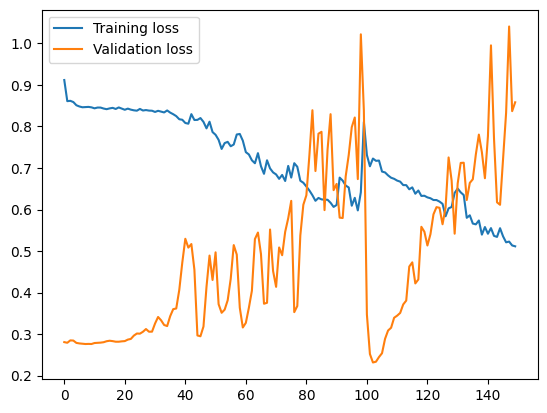

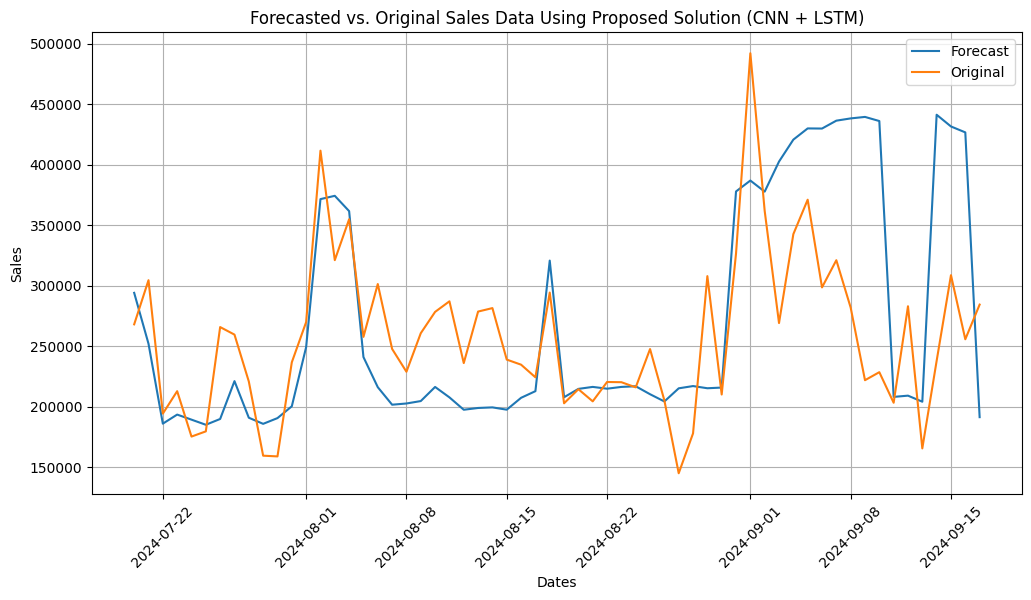

In [36]:
#### Final working code LSTM + CNN

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from datetime import datetime

# Load the dataset
df = pd.read_csv("/content/sample_data/Sales_Data_Fsd_All.csv")
#column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

df['DaySin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayCos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

# Feature Engineering (Example: Lagged Sales)
df['Lagged_Sales'] = df['Sale'].shift(1)
df = df.dropna()  # Remove rows with NaN values after shifting

df['Sales_Lag7'] = df['Sale'].shift(7)

df['Sales_MA_7'] = df['Sale'].rolling(window=7).mean()
df = df.dropna()  # Remove NaN values after calculating moving average

df['Sales_Std7'] = df['Sale'].rolling(window=7).std()

# Calculate lagged differences
df['Sales_Diff'] = df['Sale'] - df['Sale'].shift(1)
df = df.dropna()

# Create day of the week feature (0 = Monday, 6 = Sunday)
df['Day_of_Week11'] = df['Date'].dt.dayofweek  # Create 'Day_of_Week11' before selecting features

# Select features for the model
features = ['Sale', 'Lagged_Sales', 'DaySin', 'DayCos', 'Sales_Lag7', 'Status', 'EffectiveRain', 'Sales_MA_7', 'EffectiveTemperature', 'Sales_Diff', 'Sales_Std7', 'Day_of_Week11', 'PositiveEvents', 'NegativeEvents']
data = df[features]

# One-hot encode day of the week to add categorical weekday effect
data = pd.get_dummies(data, columns=['Day_of_Week11'], drop_first=True) # One-hot encode after selecting features



data = data.values # Convert to NumPy array after value replacement


#Variables for training
# cols = list(df)[1:13]
# #Date and volume columns are not used in training.
# print(cols)

#New dataframe with only training data - 13 columns
df_for_training = df[features]



# Convert 'Status' values in df_for_training to numeric representations:
df_for_training['Status'].replace(['OPEN', 'CLOSED'], [0, 1], inplace=True)

# Convert 'EffectiveRain values within the DataFrame
df_for_training['EffectiveRain'].replace(['No', 'EffectiveRain'],
                        [0, 1], inplace=True)

# Convert 'EffectiveTemperature values within the DataFrame
df_for_training['EffectiveTemperature'].replace(['No', 'HotWeather'],
                        [0, 1], inplace=True)


# Convert 'PositiveEvents values within the DataFrame
df_for_training['PositiveEvents'].replace(['No', 'SalaryDay', 'Holiday', 'Promotions', 'Event'],
                        [0, 1, 2, 3, 4], inplace=True)

# Convert 'NegativeEvents values within the DataFrame
df_for_training['NegativeEvents'].replace(['No', 'Wednesday', 'Protest', 'PartiallyClosed'],
                        [0, 1, 2, 3], inplace=True)



df_for_training = df_for_training.astype(int)


#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features.

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 60  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))



# define the Autoencoder model

model = Sequential()

# LSTM + CNN
# model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))  # CNN layer
# model.add(MaxPooling1D(pool_size=2))  # Pooling layer
# model.add(LSTM(50, return_sequences=False))  # LSTM layerers
# model.add(Dense(trainY.shape[1]))
# model.compile(optimizer='adam', loss='mse')

# Only LSTM
# model.add(LSTM(64, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(32))
# model.add(Dropout(0.2))
# model.add(Dense(trainY.shape[1]))
# model.compile(optimizer='adam', loss='mse')
# model.summary()

# Only CNN
model.add(LSTM(64, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))
# model.add(LSTM(32))
# model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')

model.summary()



# fit the model
history = model.fit(trainX, trainY, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


n_past = 60
n_days_for_prediction=60  #let us predict past 60 days

# Get training dates from the 'Date' column of the original DataFrame
train_dates = df['Date']  # Assuming 'Date' column contains datetime objects


predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
# print(predict_period_dates)


# For LSTM and Hybrid
#Make prediction
# prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

# #Perform inverse transformation to rescale back to original range
# #Since we used 5 variables for transform, the inverse expects same dimensions
# #Therefore, let us copy our values 5 times and discard them after inverse transform
# prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
# y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
# end LSTM and Hybrid


# For CNN
# Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:])  # shape = (n, 1) where n is the n_days_for_prediction

# Reshape prediction to 2D by taking the last timestep
prediction = prediction[:, -1, :]  # Select the last timestep

# Get the original number of features
num_features = df_for_training.shape[1]
# Create an array of zeros with the correct shape
filler = np.zeros((prediction.shape[0], num_features - 1))
# Concatenate the prediction with the filler array
prediction_reshaped = np.concatenate([prediction, filler], axis=1)

# Perform inverse transformation to rescale back to original range
y_pred_future = scaler.inverse_transform(prediction_reshaped)[:, 0]

# end CNN

# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

# Get the last 'n_days_for_prediction' values from the 'Sale' column
original_sales = df['Sale'].tail(n_days_for_prediction).values

df_forecast = pd.DataFrame({'Date': np.array(forecast_dates),
                            'Sale': y_pred_future.astype(int),
                            'Original': original_sales})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(df_forecast['Sale'] - df_forecast['Original']))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((df_forecast['Sale'] - df_forecast['Original'])**2))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((df_forecast['Sale'] - df_forecast['Original']) / df_forecast['Original'])) * 100

# Print the results
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

original = df[['Date', 'Sale']]
original['Date']=pd.to_datetime(original['Date'])
# original = original.loc[original['Date'] >= '2020-5-1']

print(df_forecast)
df_forecast.to_csv('forecast_sales_results.csv', index=False)
# Plotting the forecast
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(df_forecast['Date'], df_forecast['Sale'], label='Forecast')
plt.plot(df_forecast['Date'], df_forecast['Original'], label='Original')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.title('Forecasted vs. Original Sales Data Using Proposed Solution (CNN + LSTM)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#### Sales data + weather only data  (LSTM + ANN)

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

# Load the dataset
df = pd.read_csv("/content/sample_data/Sales_Data_Fsd.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

df['DaySin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayCos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

# Feature Engineering (Example: Lagged Sales)
df['Lagged_Sales'] = df['Sale'].shift(1)
df = df.dropna()  # Remove rows with NaN values after shifting

df['Sales_Lag7'] = df['Sale'].shift(7)

df['Sales_MA_7'] = df['Sale'].rolling(window=7).mean()
df = df.dropna()  # Remove NaN values after calculating moving average

df['Sales_Std7'] = df['Sale'].rolling(window=7).std()

# Calculate lagged differences
df['Sales_Diff'] = df['Sale'] - df['Sale'].shift(1)
df = df.dropna()

# Create day of the week feature (0 = Monday, 6 = Sunday)
df['Day_of_Week11'] = df['Date'].dt.dayofweek  # Create 'Day_of_Week11' before selecting features

# Select features for the model
features = ['Sale', 'Lagged_Sales', 'DaySin', 'DayCos', 'Sales_Lag7', 'precip', 'Sales_MA_7', 'Weather', 'Sales_Diff', 'Sales_Std7', 'Day_of_Week11', 'tempmax']
data = df[features]

# One-hot encode day of the week to add categorical weekday effect
data = pd.get_dummies(data, columns=['Day_of_Week11'], drop_first=True) # One-hot encode after selecting features



data = data.values # Convert to NumPy array after value replacement


#Variables for training
cols = ['Sale', 'precip', 'Weather', 'tempmax']
#Date and volume columns are not used in training.
print(cols)

#New dataframe with only training data - 5 columns
df_for_training = df[cols]

# Convert 'Weather values within the DataFrame
df_for_training['Weather'].replace(['Clear', 'Partially cloudy', 'Rain', 'Overcast', 'Rain, Overcast', 'Rain, Partially cloudy'],
                        [0, 1, 2, 3, 4, 5,], inplace=True)

df_for_training = df_for_training.astype(int)

# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features.
#In this example, the n_features is 13. We will make timesteps = 14 (past days data used for training).

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 60   # Number of days we want to look into the future based on the past days.
n_past = 60  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))



# define the Autoencoder model

model = Sequential()

# LSTM + CNN
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))  # CNN layer
model.add(MaxPooling1D(pool_size=2))  # Pooling layer
model.add(LSTM(50, return_sequences=False))  # LSTM layer
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')

model.summary()



# fit the model
history = model.fit(trainX, trainY, epochs=80, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


n_past = 60
n_days_for_prediction=60  #let us predict past 60 days

# Get training dates from the 'Date' column of the original DataFrame
train_dates = df['Date']  # Assuming 'Date' column contains datetime objects


predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
# print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

# Get the last 'n_days_for_prediction' values from the 'Sale' column
original_sales = df['Sale'].tail(n_days_for_prediction).values

df_forecast = pd.DataFrame({'Date': np.array(forecast_dates),
                            'Sale': y_pred_future.astype(int),
                            'Original': original_sales})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(df_forecast['Sale'] - df_forecast['Original']))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((df_forecast['Sale'] - df_forecast['Original'])**2))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((df_forecast['Sale'] - df_forecast['Original']) / df_forecast['Original'])) * 100

# Print the results
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

original = df[['Date', 'Sale']]
original['Date']=pd.to_datetime(original['Date'])
# original = original.loc[original['Date'] >= '2020-5-1']

print(df_forecast)
df_forecast.to_csv('forecast_sales_with_weather_data.csv', index=False)
# Plotting the forecast
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(df_forecast['Date'], df_forecast['Sale'], label='Forecast')
plt.plot(df_forecast['Date'], df_forecast['Original'], label='Original')
plt.xlabel('Date')
plt.ylabel('Sale')
plt.title('Sales Forecast vs. Original using Weather data only (LSTM)')
plt.legend()
plt.grid(True)
plt.show()

# # Plotting the results
# plt.plot(df['Date'].iloc[look_back+1:train_size], Y_train, label='Actual Sales (Train)')
# plt.plot(df['Date'].iloc[look_back+1:train_size], train_predict, label='Predicted Sales (Train)')
# plt.plot(df['Date'].iloc[train_size+look_back+1:], Y_test, label='Actual Sales (Test)')
# plt.plot(df['Date'].iloc[train_size+look_back+1:], test_predict, label='Predicted Sales (Test)')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.title('Sales Forecasting with LSTM')
# plt.legend()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/Sales_Data_Fsd.csv'

['Sale']
trainX shape == (128, 60, 1).
trainY shape == (128, 1).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 57, 64)              │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 28, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 50)                  │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,371 (91.29 KB)

 Trainable params: 23,371 (91.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.6994 - val_loss: 0.2397
Epoch 2/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.9753 - val_loss: 0.2374
Epoch 3/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.0298 - val_loss: 0.2350
Epoch 4/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.6683 - val_loss: 0.2315
Epoch 5/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.0874 - val_loss: 0.2271
Epoch 6/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.9779 - val_loss: 0.2242
Epoch 7/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.7066 - val_loss: 0.2251
Epoch 8/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.9817 - val_loss: 0.2199
Epoch 9/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.9826 - val_loss: 0.2181
Epoch 10/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.5468 - val_loss: 0.2194
Epoch 11/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.7396 - val_loss: 0.2174
Epoch 12/80
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6877 - val_loss: 0.2159


<ipython-input-17-1b79ecfc873b>:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


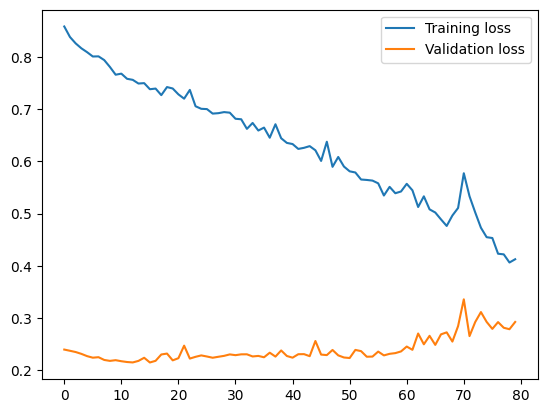

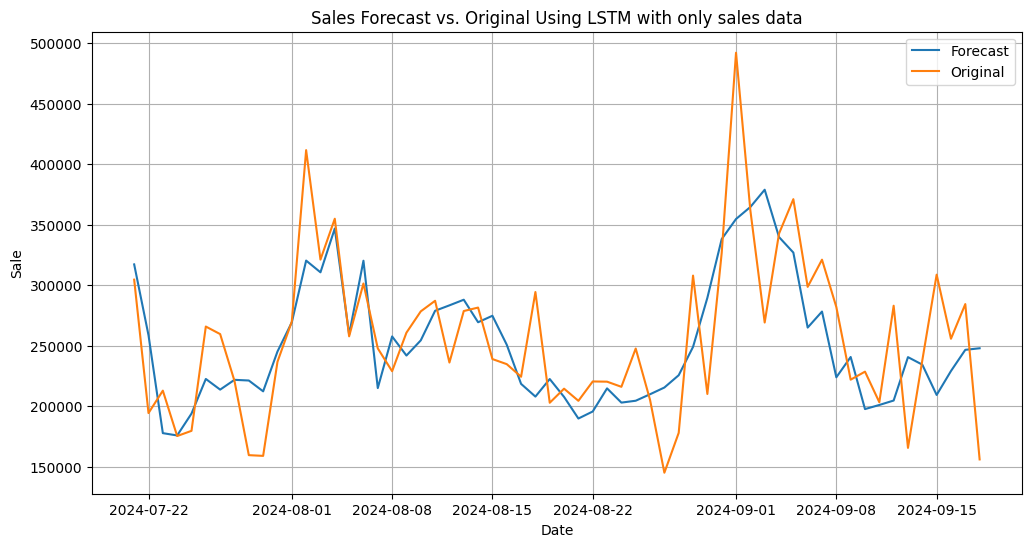

In [ ]:
#### Code with only Sales data - (LSTM + ANN)

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

# Load the dataset
df = pd.read_csv("/content/sample_data/Sales_Data_Fsd.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

df['DaySin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayCos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

# Feature Engineering (Example: Lagged Sales)
df['Lagged_Sales'] = df['Sale'].shift(1)
df = df.dropna()  # Remove rows with NaN values after shifting

df['Sales_Lag7'] = df['Sale'].shift(7)

df['Sales_MA_7'] = df['Sale'].rolling(window=7).mean()
df = df.dropna()  # Remove NaN values after calculating moving average

df['Sales_Std7'] = df['Sale'].rolling(window=7).std()

# Calculate lagged differences
df['Sales_Diff'] = df['Sale'] - df['Sale'].shift(1)
df = df.dropna()

# Create day of the week feature (0 = Monday, 6 = Sunday)
df['Day_of_Week11'] = df['Date'].dt.dayofweek  # Create 'Day_of_Week11' before selecting features

# Select features for the model
features = ['Sale', 'Lagged_Sales', 'DaySin', 'DayCos', 'Sales_Lag7', 'Sales_MA_7', 'Sales_Diff', 'Sales_Std7', 'Day_of_Week11']
data = df[features]

# One-hot encode day of the week to add categorical weekday effect
data = pd.get_dummies(data, columns=['Day_of_Week11'], drop_first=True) # One-hot encode after selecting features



data = data.values # Convert to NumPy array after value replacement


#Variables for training
cols = list(df)[1:2]
#Date and volume columns are not used in training.
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

#New dataframe with only training data - 5 columns
df_for_training = df[cols]
# Convert 'Store' values in df_for_training to numeric representations:

# df_for_training = df_for_training.astype(int)

# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features.
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training).

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 60  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))



# define the Autoencoder model

model = Sequential()

# LSTM + CNN
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))  # CNN layer
model.add(MaxPooling1D(pool_size=2))  # Pooling layer
model.add(LSTM(50, return_sequences=False))  # LSTM layer
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')

model.summary()



# fit the model
history = model.fit(trainX, trainY, epochs=80, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


n_past = 60
n_days_for_prediction=60  #let us predict past 60 days

# Get training dates from the 'Date' column of the original DataFrame
train_dates = df['Date']  # Assuming 'Date' column contains datetime objects


predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
# print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

# Get the last 'n_days_for_prediction' values from the 'Sale' column
original_sales = df['Sale'].tail(n_days_for_prediction).values

df_forecast = pd.DataFrame({'Date': np.array(forecast_dates),
                            'Sale': y_pred_future.astype(int),
                            'Original': original_sales})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(df_forecast['Sale'] - df_forecast['Original']))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((df_forecast['Sale'] - df_forecast['Original'])**2))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((df_forecast['Sale'] - df_forecast['Original']) / df_forecast['Original'])) * 100

# Print the results
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

original = df[['Date', 'Sale']]
original['Date']=pd.to_datetime(original['Date'])
# original = original.loc[original['Date'] >= '2020-5-1']

print(df_forecast)
df_forecast.to_csv('forecast_sales_just_sales_data.csv', index=False)
# Plotting the forecast
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(df_forecast['Date'], df_forecast['Sale'], label='Forecast')
plt.plot(df_forecast['Date'], df_forecast['Original'], label='Original')
plt.xlabel('Date')
plt.ylabel('Sale')
plt.title('Sales Forecast vs. Original Using LSTM with only sales data')
plt.legend()
plt.grid(True)
plt.show()

# # Plotting the results
# plt.plot(df['Date'].iloc[look_back+1:train_size], Y_train, label='Actual Sales (Train)')
# plt.plot(df['Date'].iloc[look_back+1:train_size], train_predict, label='Predicted Sales (Train)')
# plt.plot(df['Date'].iloc[train_size+look_back+1:], Y_test, label='Actual Sales (Test)')
# plt.plot(df['Date'].iloc[train_size+look_back+1:], test_predict, label='Predicted Sales (Test)')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.title('Sales Forecasting with LSTM')
# plt.legend()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


Epoch 1/100


<ipython-input-5-95799125320e>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Store'].replace(['OPEN', 'CLOSED', 'Holiday'],
<ipython-input-5-95799125320e>:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Store'].replace(['OPEN', 'CLOSED', 'Holiday'],
<ipython-input-5-95799125320e>:5

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0331
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0257
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0230
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0176
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0144
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0168
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0181
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0180
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0138
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0185
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0174
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0120
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0138
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0162
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0122
Epoch 16/100
5/5 ━━━━━━━━━━━━━━

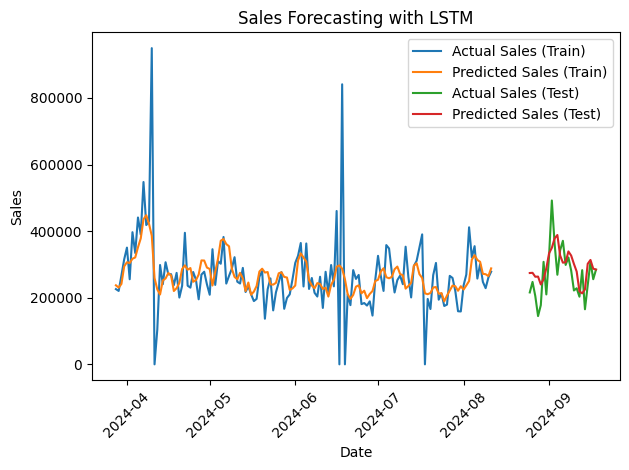

In [ ]:
## with many feature variables.

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/sample_data/Sales_Data_Fsd.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

df['DaySin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayCos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

# Feature Engineering (Example: Lagged Sales)
df['Lagged_Sales'] = df['Sale'].shift(1)
df = df.dropna()  # Remove rows with NaN values after shifting

df['Sales_Lag7'] = df['Sale'].shift(7)

df['Sales_MA_7'] = df['Sale'].rolling(window=7).mean()
df = df.dropna()  # Remove NaN values after calculating moving average

df['Sales_Std7'] = df['Sale'].rolling(window=7).std()

# Calculate lagged differences
df['Sales_Diff'] = df['Sale'] - df['Sale'].shift(1)
df = df.dropna()

# Create day of the week feature (0 = Monday, 6 = Sunday)
df['Day_of_Week11'] = df['Date'].dt.dayofweek  # Create 'Day_of_Week11' before selecting features

# Select features for the model
# features = ['Sale', 'Lagged_Sales', 'precip', 'Store', 'Weather', 'Day_of_Week11', ...] # Include 'Day_of_Week11'
features = ['Sale', 'Lagged_Sales', 'DaySin', 'DayCos', 'Sales_Lag7', 'precip', 'Store', 'Sales_MA_7', 'Weather', 'Sales_Diff', 'Sales_Std7', 'Day_of_Week11', 'tempmax', 'SalaryDay']
data = df[features]

# One-hot encode day of the week to add categorical weekday effect
data = pd.get_dummies(data, columns=['Day_of_Week11'], drop_first=True) # One-hot encode after selecting features

# Convert 'Store' values within the DataFrame
data['Store'].replace(['OPEN', 'CLOSED', 'Holiday'],
                        [0, 1, 2], inplace=True)

# Convert 'Weather values within the DataFrame
data['Weather'].replace(['Clear', 'Partially cloudy', 'Rain', 'Overcast', 'Rain, Overcast', 'Rain, Partially cloudy'],
                        [0, 1, 2, 3, 4, 5,], inplace=True)

data = data.values # Convert to NumPy array after value replacement


# Normalize the dataset
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[0:train_size, :], data[train_size:len(data), :]

# Create dataset with lookback
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 0])  # Predict 'Sale'
    return np.array(X), np.array(Y)

look_back = 12  # Number of previous days to consider
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for 'Sale' prediction

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], data.shape[1]-1))), axis=1))[:,0]
Y_train = scaler.inverse_transform(np.concatenate((Y_train.reshape(-1, 1), np.zeros((Y_train.shape[0], data.shape[1]-1))), axis=1))[:,0]
test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], data.shape[1]-1))), axis=1))[:,0]
Y_test = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1, 1), np.zeros((Y_test.shape[0], data.shape[1]-1))), axis=1))[:,0]

# Calculate root mean squared error
train_score = np.sqrt(mean_squared_error(Y_train, train_predict))
print('Train Score: %.2f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(Y_test, test_predict))
print('Test Score: %.2f RMSE' % (test_score))


# Get the last 30 dates from the original dataframe for prediction
train_dates = (df['Date'])
predict_period_dates = pd.date_range(list(train_dates)[-25], periods=len(test_predict)).tolist()  # Adjust periods to match test_predict length


forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

# Create DataFrame for the test set predictions
df_forecast = pd.DataFrame({'Date': predict_period_dates,
                            'Sale Predicted': test_predict.astype(int)})  # Use test_predict instead of train_predict
# Access original data using total_sales_per_date, which is a DataFrame
df_forecast['Original Sales'] = df['Sale'].iloc[-len(test_predict):].values  # Use .values to get NumPy array

# df_forecast['Date'] = (data['Date'])

# original = df[['Date', 'Sale']]
# original['Date'] = pd.to_datetime(original['Date'])

print(df_forecast)
df_forecast.to_csv('forecast_sales_fsb.csv', index=False)
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Plotting the results
plt.plot(df['Date'].iloc[look_back+1:train_size], Y_train, label='Actual Sales (Train)')
plt.plot(df['Date'].iloc[look_back+1:train_size], train_predict, label='Predicted Sales (Train)')
plt.plot(df['Date'].iloc[train_size+look_back+1:], Y_test, label='Actual Sales (Test)')
plt.plot(df['Date'].iloc[train_size+look_back+1:], test_predict, label='Predicted Sales (Test)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting with LSTM')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-11-48a857dc8073>:13: DtypeWarning: Columns (0,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/sample_data/retail_data.csv")
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


0      01/03/2016
1      01/04/2016
2      01/05/2016
3      01/06/2016
4      01/07/2016
5      01/08/2016
6      01/10/2016
7      01/11/2016
8      01/12/2016
9      02/01/2016
10     02/02/2016
11     02/03/2016
12     02/04/2016
13     02/05/2016
14     02/08/2016
15     02/09/2016
16     02/10/2016
17     02/11/2016
18     02/12/2016
19     03/01/2016
20     03/02/2016
21     03/03/2016
22     03/04/2016
23     03/05/2016
24     03/06/2016
25     03/07/2016
26     03/08/2016
27     03/09/2016
28     03/10/2016
29     03/11/2016
30     04/01/2016
31     04/03/2016
32     04/04/2016
33     04/05/2016
34     04/06/2016
35     04/07/2016
36     04/08/2016
37     04/10/2016
38     04/11/2016
39     04/12/2016
40     05/01/2016
41     05/02/2016
42     05/03/2016
43     05/04/2016
44     05/05/2016
45     05/06/2016
46     05/09/2016
47     05/10/2016
48     05/11/2016
49     05/12/2016
50     06/01/2016
51     06/02/2016
52     06/03/2016
53     06/05/2016
54     06/06/2016
55     06/

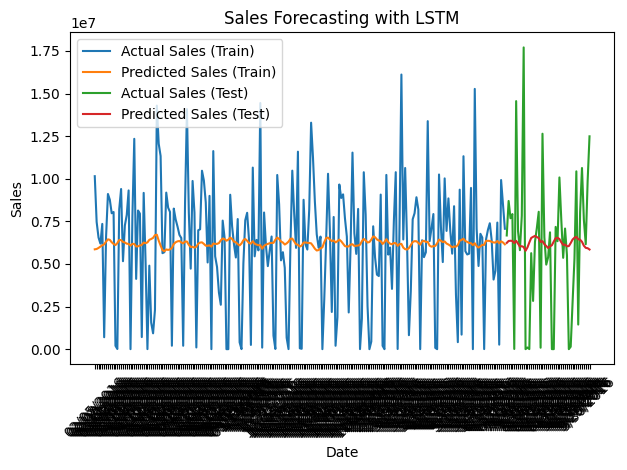

In [ ]:
# it is to test LSTM with new  dataset


import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/sample_data/retail_data.csv")

# Convert 'Order_Demand' column to numeric, handling errors
df['Order_Demand'] = pd.to_numeric(df['Order_Demand'], errors='coerce')

# Group by 'Date' and sum the 'Sales' for each date
total_sales_per_date = df.groupby('Date', as_index=False)['Order_Demand'].sum()

# Save the aggregated data to a new CSV file
# total_sales_per_date.to_csv('total_sales_per_date.csv', index=False)

print(total_sales_per_date['Date'])
# Assign the values of total_sales_per_date to data for scaling
data = total_sales_per_date[['Order_Demand']].values  # Select the 'Order_Demand' column and convert to NumPy array


# Normalize the dataset
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[0:train_size, :], data[train_size:len(data), :]

# Create dataset with lookback
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 0])  # Predict 'Sale'
    return np.array(X), np.array(Y)

look_back = 12  # Number of previous days to consider
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for 'Sale' prediction

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], data.shape[1]-1))), axis=1))[:,0]
Y_train = scaler.inverse_transform(np.concatenate((Y_train.reshape(-1, 1), np.zeros((Y_train.shape[0], data.shape[1]-1))), axis=1))[:,0]
test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], data.shape[1]-1))), axis=1))[:,0]
Y_test = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1, 1), np.zeros((Y_test.shape[0], data.shape[1]-1))), axis=1))[:,0]

# Calculate root mean squared error
train_score = np.sqrt(mean_squared_error(Y_train, train_predict))
print('Train Score: %.2f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(Y_test, test_predict))
print('Test Score: %.2f RMSE' % (test_score))

# Get the last 30 dates from the original dataframe for prediction
train_dates = (df['Date'])
predict_period_dates = pd.date_range(list(train_dates)[-25], periods=len(test_predict)).tolist()  # Adjust periods to match test_predict length

forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

# Create DataFrame for the test set predictions
df_forecast = pd.DataFrame({'Date': predict_period_dates,
                            'Sale': test_predict.astype(int)})  # Use test_predict instead of train_predict
                            # 'Original': data['Order_Demand'].iloc[-len(test_predict):]})  # Adjust slicing for 'Original'
# Access original data using total_sales_per_date, which is a DataFrame
df_forecast['Original'] = total_sales_per_date['Order_Demand'].iloc[-len(test_predict):].values  # Use .values to get NumPy array

df_forecast['Date'] = (total_sales_per_date['Date'])

# original = df[['Date', 'Sale']]
# original['Date'] = pd.to_datetime(original['Date'])

print(df_forecast)
df_forecast.to_csv('forecast_sales_results.csv', index=False)

# Plotting the results
# Create a date range for plotting the test data
test_dates = total_sales_per_date['Date'].iloc[train_size+look_back+1:]

# Plot the data
plt.plot(total_sales_per_date['Date'].iloc[look_back+1:train_size], Y_train, label='Actual Sales (Train)')
plt.plot(total_sales_per_date['Date'].iloc[look_back+1:train_size], train_predict, label='Predicted Sales (Train)')
plt.plot(test_dates, Y_test, label='Actual Sales (Test)')  # Use test_dates for the x-axis
plt.plot(test_dates, test_predict, label='Predicted Sales (Test)')  # Use test_dates for the x-axis
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting with LSTM')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.4169
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3498 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2677 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1971 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1450 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0962 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1116 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1193 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1097
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0800 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0839 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0901 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0826
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0918 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0831 
Epoch 16/100
2/2 ━━

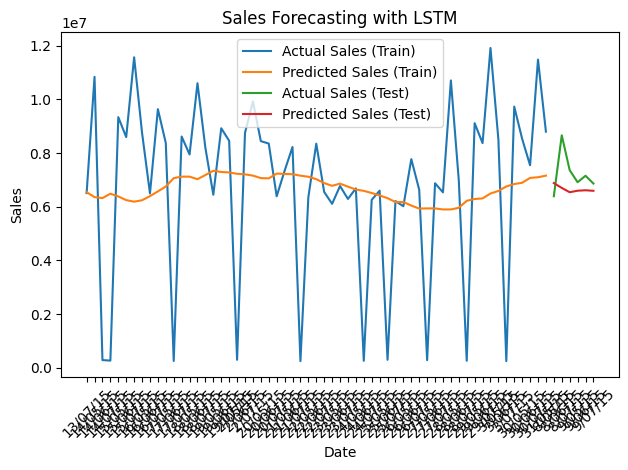

In [ ]:
# it is to test LSTM with new  dataset - 2


import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/sample_data/rossman.csv")

# Convert 'Order_Demand' column to numeric, handling errors
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Group by 'Date' and sum the 'Sales' for each date
total_sales_per_date = df.groupby('Date', as_index=False)['Sales'].sum()

# Save the aggregated data to a new CSV file
# total_sales_per_date.to_csv('total_sales_per_date.csv', index=False)

# print(total_sales_per_date['Date'])
# Assign the values of total_sales_per_date to data for scaling
data = total_sales_per_date[['Sales']].values  # Select the 'Order_Demand' column and convert to NumPy array


# Normalize the dataset
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[0:train_size, :], data[train_size:len(data), :]

# Create dataset with lookback
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 0])  # Predict 'Sale'
    return np.array(X), np.array(Y)

look_back = 12  # Number of previous days to consider
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for 'Sale' prediction

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], data.shape[1]-1))), axis=1))[:,0]
Y_train = scaler.inverse_transform(np.concatenate((Y_train.reshape(-1, 1), np.zeros((Y_train.shape[0], data.shape[1]-1))), axis=1))[:,0]
test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], data.shape[1]-1))), axis=1))[:,0]
Y_test = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1, 1), np.zeros((Y_test.shape[0], data.shape[1]-1))), axis=1))[:,0]

# Calculate root mean squared error
train_score = np.sqrt(mean_squared_error(Y_train, train_predict))
print('Train Score: %.2f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(Y_test, test_predict))
print('Test Score: %.2f RMSE' % (test_score))

# Get the last 30 dates from the original dataframe for prediction
train_dates = (df['Date'])
predict_period_dates = pd.date_range(list(train_dates)[-25], periods=len(test_predict)).tolist()  # Adjust periods to match test_predict length

forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

# Create DataFrame for the test set predictions
df_forecast = pd.DataFrame({'Date': predict_period_dates,
                            'Sale': test_predict.astype(int)})  # Use test_predict instead of train_predict
                            # 'Original': data['Order_Demand'].iloc[-len(test_predict):]})  # Adjust slicing for 'Original'
# Access original data using total_sales_per_date, which is a DataFrame
df_forecast['Original'] = total_sales_per_date['Sales'].iloc[-len(test_predict):].values  # Use .values to get NumPy array

df_forecast['Date'] = (total_sales_per_date['Date'])

df_forecast.to_csv('results_forecast_rossman.csv', index=False)
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df_forecast)




# Plotting the results
# Create a date range for plotting the test data
test_dates = total_sales_per_date['Date'].iloc[train_size+look_back+1:]

# Plot the data
plt.plot(total_sales_per_date['Date'].iloc[look_back+1:train_size], Y_train, label='Actual Sales (Train)')
plt.plot(total_sales_per_date['Date'].iloc[look_back+1:train_size], train_predict, label='Predicted Sales (Train)')
plt.plot(test_dates, Y_test, label='Actual Sales (Test)')  # Use test_dates for the x-axis
plt.plot(test_dates, test_predict, label='Predicted Sales (Test)')  # Use test_dates for the x-axis
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting with LSTM')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


<ipython-input-44-4b863730497a>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])
<ipython-input-44-4b863730497a>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Store'].replace(['OPEN', 'CLOSED', 'Holiday'],
<ipython-input-44-4b863730497a>:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future 

Actual: 362993, Predicted: 5546.80419921875, Date: 2024-06-04T00:00:00.000000000
Actual: 382643, Predicted: 6320.6943359375, Date: 2024-03-16T00:00:00.000000000
Actual: 350522, Predicted: 6320.6943359375, Date: 2024-03-31T00:00:00.000000000
Actual: 247678, Predicted: 4880.6328125, Date: 2024-08-07T00:00:00.000000000
Actual: 269059, Predicted: 6451.5947265625, Date: 2024-09-03T00:00:00.000000000
Actual: 180847, Predicted: 4846.015625, Date: 2024-06-24T00:00:00.000000000
Actual: 321836, Predicted: 5343.251953125, Date: 2024-05-09T00:00:00.000000000
Actual: 214376, Predicted: 6597.1083984375, Date: 2024-08-20T00:00:00.000000000
Actual: 260661, Predicted: 7672.8662109375, Date: 2024-08-09T00:00:00.000000000
Actual: 270090, Predicted: 6130.62109375, Date: 2024-04-15T00:00:00.000000000
Actual: 242551, Predicted: 4577.6962890625, Date: 2024-05-06T00:00:00.000000000
Actual: 159432, Predicted: 7295.6416015625, Date: 2024-07-29T00:00:00.000000000
Actual: 281416, Predicted: 4889.88525390625, Date

Text(0.5, 0, 'Data Point Index')

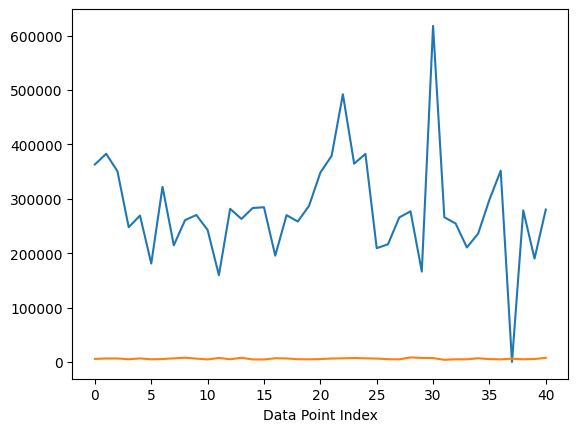

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load your sales dataset
data = pd.read_csv("/content/sample_data/Sales_Data_Fsd.csv")

# Convert 'Date' to datetime if necessary
data['Date'] = pd.to_datetime(data['Date'])

# Let's assume you want to predict 'Sales' and that it's numeric
# **Keep the Date column for later use:**
# dates = data['Date']  # Store the Date column
# data = data.drop('Date', axis=1)

# Convert 'Store' and 'Weather' to numerical values before scaling
data['Store'].replace(['OPEN', 'CLOSED', 'Holiday'],
                        [0, 1, 2], inplace=True)

data['Weather'].replace(['Clear', 'Partially cloudy', 'Rain', 'Overcast', 'Rain, Overcast', 'Rain, Partially cloudy'],
                        [0, 1, 2, 3, 4, 5,], inplace=True)

# Separate features (X) and target (y) after converting categorical features
X = data.drop(['Sale', 'Date'], axis=1).values  # all features except Sales and Date
y = data['Sale'].values  # target is the Sales
dates = data['Date'].values # Store the Date column as values


# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X_scaled, y, dates, test_size=0.2, random_state=42
)

# ... (rest of your model code) ...


y_pred = model.predict(X_test)

# Optionally, compare the predicted and actual sales
# Use the stored 'dates' variable to access dates
for i in range(25):  # Show first 10 predictions
    print(f'Actual: {y_test[i]}, Predicted: {y_pred[i][0]}, Date: {dates_test[i]}')  # Access date using index

# Create a range of indices for plotting that matches the length of y_test
plot_indices = range(len(y_test))

# Use plot_indices for plotting instead of incorrect slicing
plt.plot(plot_indices, y_test, label='Actual Sales')
plt.plot(plot_indices, y_pred, label='Predicted Sales')

plt.xlabel('Data Point Index')  # Change x-axis label to